## Generate 100 * exp distribution

Text(0.5, 1.0, 'Target Distribution')

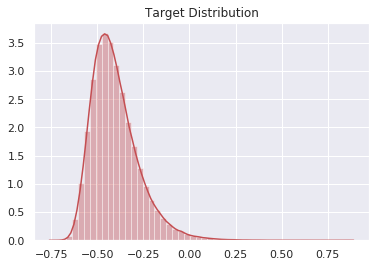

In [82]:
import seaborn as sns, numpy as np
dataset = np.zeros((2000,200))
for i in range(2000):
    dataset[i] = np.log(np.random.exponential(size=200) * 100) / 10 * -1
sns.distplot(dataset,color='r').set_title("Target Distribution")

Epoch: 0
Before sort real acc: 1.0 Before sort fake acc: 0.0
After sort real acc: 1.0 After sort fake acc 0.0


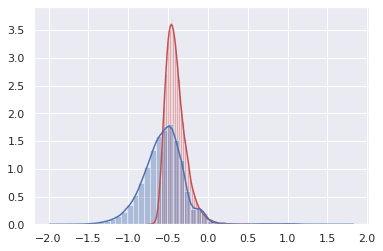

Epoch: 500
Before sort real acc: 1.0 Before sort fake acc: 0.009999999776482582
After sort real acc: 1.0 After sort fake acc 0.03999999910593033


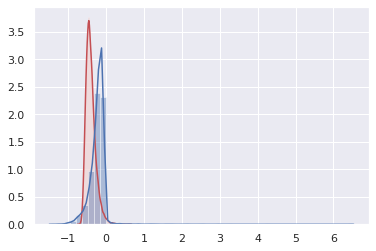

Epoch: 1000
Before sort real acc: 0.9800000190734863 Before sort fake acc: 0.9399999976158142
After sort real acc: 1.0 After sort fake acc 0.9200000166893005


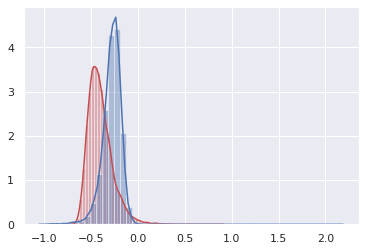

Epoch: 1500
Before sort real acc: 1.0 Before sort fake acc: 0.0
After sort real acc: 1.0 After sort fake acc 0.0


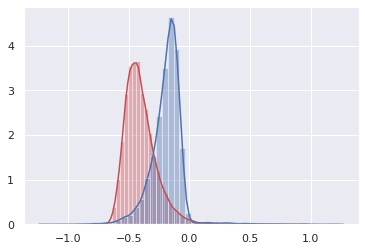

Epoch: 2000
Before sort real acc: 1.0 Before sort fake acc: 0.5299999713897705
After sort real acc: 1.0 After sort fake acc 0.20000000298023224


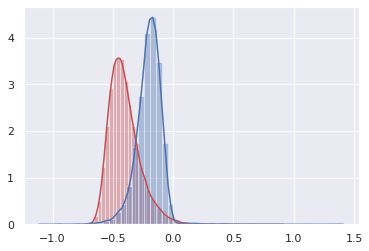

Epoch: 2500
Before sort real acc: 0.8500000238418579 Before sort fake acc: 0.7300000190734863
After sort real acc: 1.0 After sort fake acc 0.8399999737739563


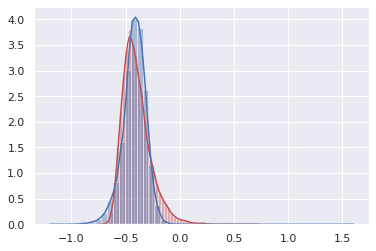

Epoch: 3000
Before sort real acc: 0.9100000262260437 Before sort fake acc: 0.47999998927116394
After sort real acc: 1.0 After sort fake acc 0.019999999552965164


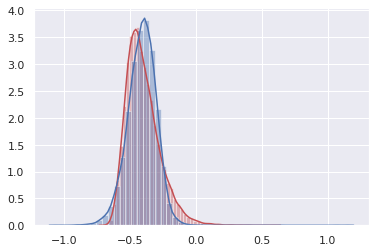

Epoch: 3500
Before sort real acc: 0.25999999046325684 Before sort fake acc: 0.9800000190734863
After sort real acc: 0.0 After sort fake acc 0.9700000286102295


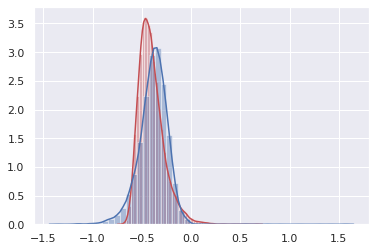

Epoch: 4000
Before sort real acc: 1.0 Before sort fake acc: 0.3499999940395355
After sort real acc: 1.0 After sort fake acc 0.3400000035762787


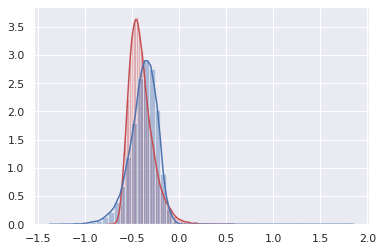

Epoch: 4500
Before sort real acc: 0.8700000047683716 Before sort fake acc: 0.5600000023841858
After sort real acc: 0.9800000190734863 After sort fake acc 0.7099999785423279


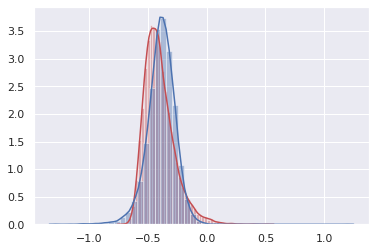

Epoch: 5000
Before sort real acc: 0.47999998927116394 Before sort fake acc: 0.7799999713897705
After sort real acc: 0.0 After sort fake acc 0.9200000166893005


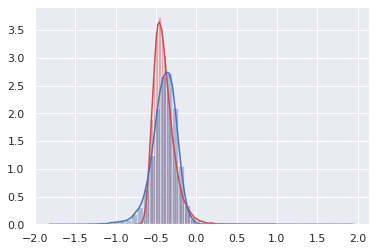

Epoch: 5500
Before sort real acc: 0.8700000047683716 Before sort fake acc: 0.9700000286102295
After sort real acc: 0.05000000074505806 After sort fake acc 1.0


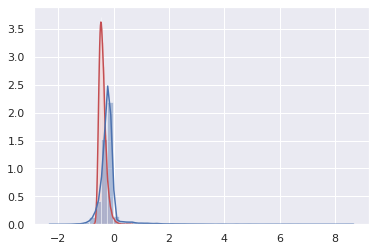

Epoch: 6000
Before sort real acc: 1.0 Before sort fake acc: 0.4399999976158142
After sort real acc: 1.0 After sort fake acc 0.47999998927116394


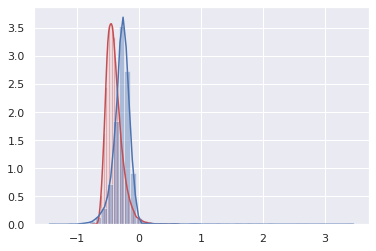

Epoch: 6500
Before sort real acc: 0.11999999731779099 Before sort fake acc: 0.9700000286102295
After sort real acc: 0.9800000190734863 After sort fake acc 0.550000011920929


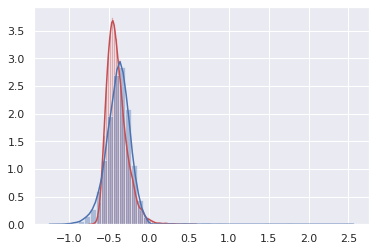

Epoch: 7000
Before sort real acc: 0.3100000023841858 Before sort fake acc: 0.9599999785423279
After sort real acc: 1.0 After sort fake acc 0.38999998569488525


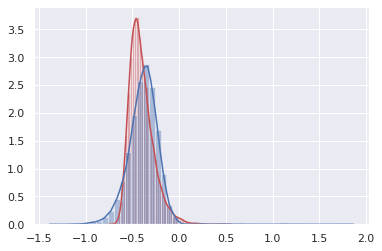

Epoch: 7500
Before sort real acc: 0.9599999785423279 Before sort fake acc: 0.2800000011920929
After sort real acc: 1.0 After sort fake acc 0.25999999046325684


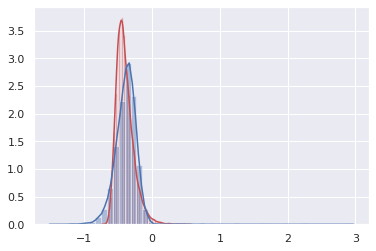

In [80]:
from numpy import hstack
from numpy import zeros
from numpy import ones
from numpy.random import rand,randint
from numpy.random import randn, exponential
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, BatchNormalization
from matplotlib import pyplot
from keras import optimizers
import tensorflow as tf
from numpy.random import random, choice
# Disable warning display
import warnings
warnings.filterwarnings('ignore')

real_acc=[[],[]]
fake_acc=[[],[]]
real_sort_acc=[[],[]]
fake_sort_acc=[[],[]]
g_loss=[[],[]]
d_loss=[[],[]]

# define the standalone discriminator model
def define_discriminator(n_inputs=200):
    model = Sequential()
    model.add(Dense(100, input_dim=n_inputs))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(200))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(200))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(200))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = optimizers.Adam(lr=0.008, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

# define the standalone generator model
def define_generator(latent_dim, n_outputs=200):
    model = Sequential()
    model.add(Dense(100, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(200))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(200))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(200))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(n_outputs))
    model.add(LeakyReLU(alpha=0.1))
    return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    # connect them
    model = Sequential()
    # add generator
    model.add(generator)
    # add the discriminator
    model.add(discriminator)
    # compile model
    opt = optimizers.Adam(lr=0.002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

# generate n real samples with class labels
def generate_real_samples(dataset, n_samples):
    ix = randint(0, dataset.shape[0],n_samples)
    x = dataset[ix]
    y=ones((n_samples,1))
    return x, y

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
    # generate points in the latent space
    x_input = randn(latent_dim * n)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n, latent_dim)
    return x_input

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n):
    # generate points in latent space
    x_input = generate_latent_points(latent_dim, n)
    # predict outputs
    X = generator.predict(x_input)
    # create class labels
    y = zeros((n, 1))
    return X, y

# evaluate the discriminator and plot real and fake points
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
    sns.set()
    # prepare real samples
    x_real, y_real = generate_real_samples(dataset,n)
    # evaluate discriminator on real examples
    _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
    # sort the sequence
    x_real.sort(axis=1)
    _, acc_real_after = discriminator.evaluate(x_real, y_real, verbose = 0)
    # prepare fake examples
    x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
    # evaluate discriminator on fake examples
    _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
    # sort the sequence
    x_fake.sort(axis=1)
    _, acc_fake_after = discriminator.evaluate(x_fake, y_fake, verbose = 0)
    # summarize discriminator performance
    print("Epoch:",epoch)
    print("Before sort real acc:",acc_real, "Before sort fake acc:",acc_fake)
    print("After sort real acc:", acc_real_after, "After sort fake acc", acc_fake_after)
    
    real_acc[1].append(acc_real)
    real_acc[0].append(epoch)
    fake_acc[1].append(acc_fake)
    fake_acc[0].append(epoch)
    
    real_sort_acc[0].append(epoch)
    fake_sort_acc[0].append(epoch)
    real_sort_acc[1].append(acc_real_after)
    fake_sort_acc[1].append(acc_fake_after)
    # scatter plot real and fake data points
    sns.distplot(x_real,color='r')
    sns.distplot(x_fake,color='b')
#     file = str(epoch)+'.png'
#     pyplot.savefig(file)
    pyplot.show()
#     pyplot.close()

def smooth_positive_labels(y):
    return y - 0.3 + (random(y.shape) * 0.5)
def smooth_negative_labels(y):
    return y + 0.3 + (random(y.shape) * 0.3)


# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=8000, n_batch=64, n_eval=500):
    # determine half the size of one batch, for updating the discriminator
    bat_per_eop = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    # manually enumerate epochs
    for i in range(n_epochs):
        for j in range(bat_per_eop):
            # prepare real samples
            x_real, y_real = generate_real_samples(dataset,half_batch)
            # prepare fake examples
            x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            y_real = smooth_positive_labels(y_real)
            y_fake = smooth_negative_labels(y_fake)
            # update discriminator
            loss_1=d_model.train_on_batch(x_real, y_real)
            loss_2=d_model.train_on_batch(x_fake, y_fake)
            # prepare points in latent space as input for the generator
            x_gan = generate_latent_points(latent_dim, n_batch)
            # create inverted labels for the fake samples
            y_gan = ones((n_batch, 1))
            y_gan = smooth_positive_labels(y_gan)
            # update the generator via the discriminator's error
            loss_3=gan_model.train_on_batch(x_gan, y_gan)
            # evaluate the model every n_eval epochs
        if i % n_eval == 0:
            d_loss[1].append(loss_1[0]+loss_2[0])
            g_loss[1].append(loss_3)
            d_loss[0].append(i)
            g_loss[0].append(i)
            summarize_performance(i, g_model, d_model, latent_dim)

with tf.device('/device:GPU:1'):

    # size of the latent space
    latent_dim = 30
    # create the discriminator
    discriminator = define_discriminator()
    # create the generator
    generator = define_generator(latent_dim)
    # create the gan
    gan_model = define_gan(generator, discriminator)
    # train model
    train(generator, discriminator, gan_model, latent_dim)

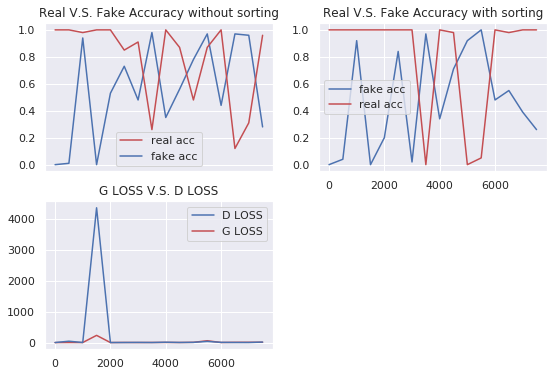

In [81]:
pyplot.figure(figsize=(9,6))
pyplot.subplot(221).axes.get_xaxis().set_visible(False)
pyplot.title("Real V.S. Fake Accuracy without sorting")
line_down, =pyplot.plot(fake_acc[0],fake_acc[1],color='b',label="fake acc")
line_up, =pyplot.plot(real_acc[0],real_acc[1],color='r',label="real acc")
pyplot.legend(handles=[line_up, line_down])

pyplot.subplot(222)
pyplot.title("Real V.S. Fake Accuracy with sorting")
line_up, =pyplot.plot(fake_sort_acc[0],fake_sort_acc[1],color='b',label="fake acc")
line_down, =pyplot.plot(real_sort_acc[0],real_sort_acc[1],color='r',label="real acc")
pyplot.legend(handles=[line_up, line_down])

pyplot.subplot(223)
pyplot.title("G LOSS V.S. D LOSS")
line_down, =pyplot.plot(g_loss[0],g_loss[1],color='r',label="G LOSS")
line_up, =pyplot.plot(d_loss[0],d_loss[1],color='b',label="D LOSS")
pyplot.legend(handles=[line_up, line_down])
